### 다중클래스 분류 프로그램
- 심층신경망 사용 

In [1]:
import pandas as pd
import tensorflow as tf 
import seaborn as sns
import numpy as np

In [2]:
white = pd.read_csv("winequality-white.csv", sep=';')

In [3]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print(white['quality'].value_counts())  # 3-9까지의 값만 존재함 

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


In [5]:
print(white.shape)


(4898, 12)


c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


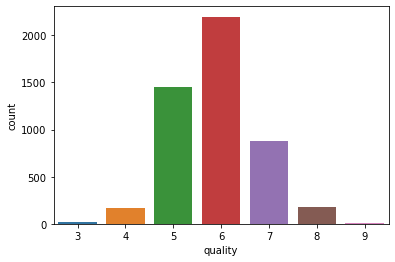

In [6]:
sns.countplot(white['quality'])  # 7개 클래스만 존재 => 불균형 데이터 

In [7]:
white.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [8]:
white['quality'] -= 3
white['quality'].value_counts()  # 0~6까지의 클래스로 변경


3    2198
2    1457
4     880
5     175
1     163
0      20
6       5
Name: quality, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221542EDBB0>,
      dtype=object)

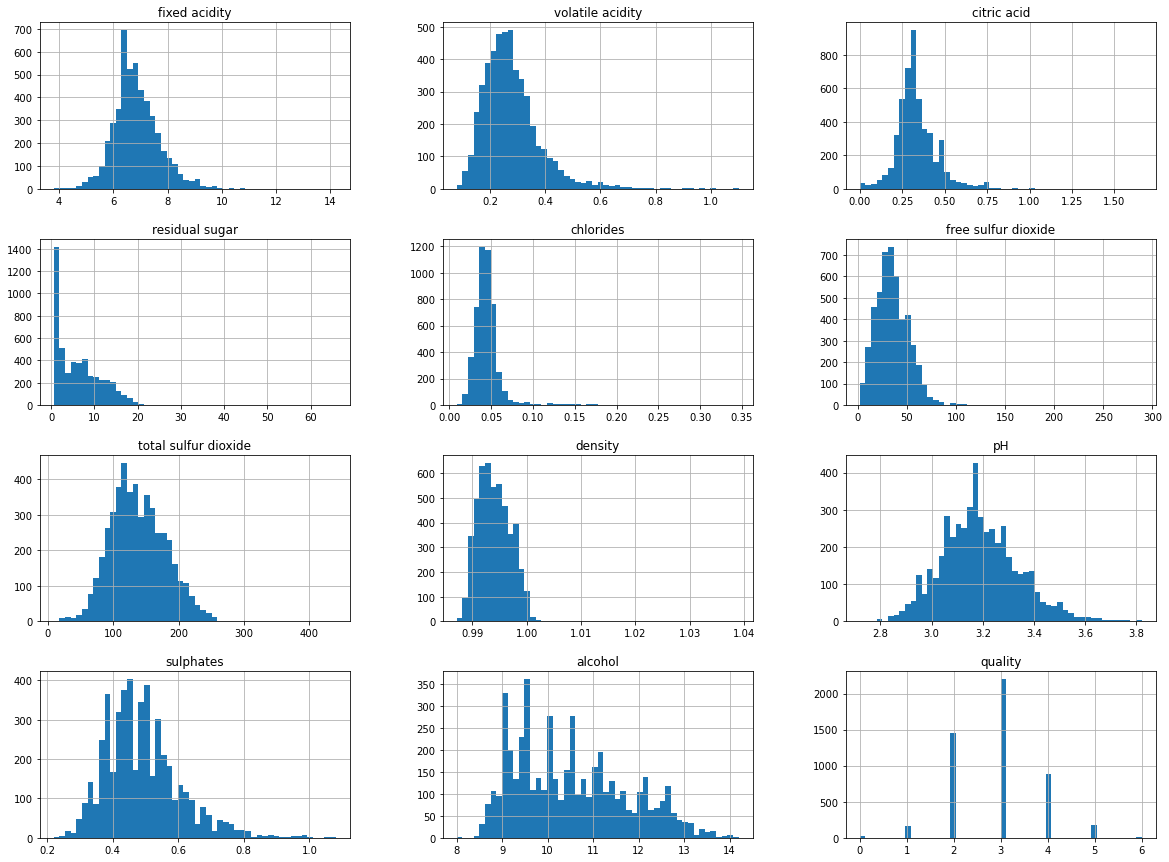

In [9]:
white.hist(bins=50, figsize=(20, 15))

In [10]:
feature_data = white.drop('quality', axis=1).copy()
label_data = white['quality'].copy()

In [11]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(feature_data)


In [12]:
# 데이터 복제

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


# 모델설정
sm = SMOTE(k_neighbors=4)

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_sample(X, list(label_data))



In [13]:
X = pd.DataFrame(X_resampled, columns=feature_data.columns)
y = np.array(y_resampled)

c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


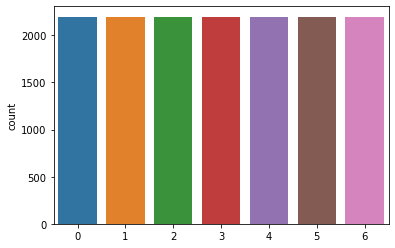

In [14]:
sns.countplot(y)

In [15]:
train_df = pd.DataFrame(X, columns=feature_data.columns)

In [16]:
train_df.shape 

(15386, 11)

In [17]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(12308, 11)
(12308,)
(3078, 11)
(3078,)


In [20]:
train_Y = tf.keras.utils.to_categorical(
    y_train, num_classes=7)  # 범주형 데이터를 원핫인코딩
test_Y = tf.keras.utils.to_categorical(
    y_test, num_classes=7)


In [21]:
train_Y.shape

(12308, 7)

In [22]:
# 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=X_train.shape[1])),
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(128, activation='relu')),
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(32, activation='relu')),
model.add(tf.keras.layers.Dense(32, activation='relu')),
model.add(tf.keras.layers.Dropout(0.2)),
model.add(tf.keras.layers.Dense(7, activation='softmax'))


In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, train_Y, epochs=500, batch_size=100, validation_split=0.2, verbose=2)


Epoch 1/500
99/99 - 1s - loss: 1.5732 - accuracy: 0.3662 - val_loss: 1.1042 - val_accuracy: 0.5471 - 1s/epoch - 12ms/step
Epoch 2/500
99/99 - 0s - loss: 1.1475 - accuracy: 0.5215 - val_loss: 0.9109 - val_accuracy: 0.6243 - 353ms/epoch - 4ms/step
Epoch 3/500
99/99 - 0s - loss: 1.0111 - accuracy: 0.5721 - val_loss: 0.8500 - val_accuracy: 0.6413 - 356ms/epoch - 4ms/step
Epoch 4/500
99/99 - 0s - loss: 0.9338 - accuracy: 0.5953 - val_loss: 0.7810 - val_accuracy: 0.6751 - 362ms/epoch - 4ms/step
Epoch 5/500
99/99 - 0s - loss: 0.8835 - accuracy: 0.6162 - val_loss: 0.7592 - val_accuracy: 0.6637 - 360ms/epoch - 4ms/step
Epoch 6/500
99/99 - 0s - loss: 0.8460 - accuracy: 0.6292 - val_loss: 0.7357 - val_accuracy: 0.6901 - 371ms/epoch - 4ms/step
Epoch 7/500
99/99 - 0s - loss: 0.8209 - accuracy: 0.6435 - val_loss: 0.7226 - val_accuracy: 0.6946 - 356ms/epoch - 4ms/step
Epoch 8/500
99/99 - 0s - loss: 0.7950 - accuracy: 0.6517 - val_loss: 0.7035 - val_accuracy: 0.6954 - 359ms/epoch - 4ms/step
Epoch 9/50

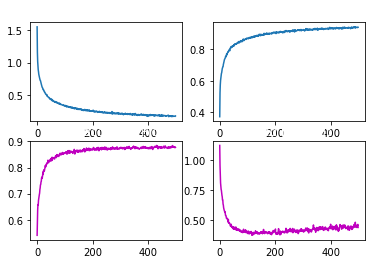

In [ ]:
import matplotlib.pyplot as plt 

loss = history.history['loss']  # 훈련데이터 손실값
acc = history.history['accuracy']  # 정확도
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# 손실값을 그래프로 출력 => 검증 세트의 손실값이 증가하는 경향 확인(과대적합)
plt.subplot(221)
plt.title("train loss Plot", color='w')
plt.plot(loss)

plt.subplot(222)
plt.title("train accuracy Plot", color='w')
plt.plot(acc)

plt.subplot(223)
plt.title("valid accuracy Plot", color='w')
plt.plot(val_acc, color='m')

plt.subplot(224)
plt.title("valid loss Plot", color='w')
plt.plot(val_loss, color='m')

plt.xlabel("epochs", color='w')

plt.show()


In [ ]:
model.evaluate(X_test, test_Y)

97/97 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8980


[0.35208964347839355, 0.8979856967926025]

In [ ]:
train_pred = model.predict(X_train)
test_pred =model.predict(X_test)


train_class = [np.argmax(y, axis=None, out=None) for y in train_pred]
test_class = [np.argmax(y, axis=None, out=None) for y in test_pred]


97/97 [==============================] - 0s 969us/step


c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


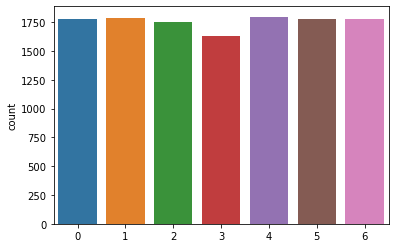

In [ ]:
sns.countplot(train_class)

c:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


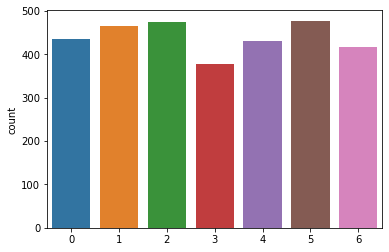

In [ ]:
sns.countplot(test_class)

In [ ]:
print(pd.DataFrame((train_class == y_train)).value_counts())

print()

print(pd.DataFrame((test_class == y_test)).value_counts())


True     11917
False      391
dtype: int64

True     2764
False     314
dtype: int64
